In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import  classification_report, confusion_matrix

In [2]:
# Load both datasets
newsgroup_X, newsgroup_y = fetch_20newsgroups_vectorized(return_X_y=True)
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)

In [3]:
# Split the datasets into training and test data
newsgroup_X_train, newsgroup_X_test, newsgroup_y_train, newsgroup_y_test = train_test_split(newsgroup_X, newsgroup_y, random_state=42)
breast_cancer_X_train, breast_cancer_X_test, breast_cancer_y_train, breast_cancer_y_test = train_test_split(breast_cancer_X, breast_cancer_y, random_state=42)

Now, train a random forest model on the *Breast cancer* data. This is the binary classification problem.

In [4]:
bc_rf_clf = RandomForestClassifier(n_estimators=24, random_state=64)
bc_rf_clf.fit(breast_cancer_X_train, breast_cancer_y_train)

RandomForestClassifier(n_estimators=24, random_state=64)

You can look at a few of the metrics that you saw previously. For simplicity, just use the classification report.

In [5]:
# First, generate predictions on the test data
bc_predictions = bc_rf_clf.predict(breast_cancer_X_test)
bc_report = classification_report(breast_cancer_y_test, bc_predictions)
print(bc_report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



From this report, you can see that there are two classes, represented by `0` and `1` and their respective scores. Now, look at the multiclass problem with the *20 newsgroups* dataset.

In [6]:
ng_rf_clf = RandomForestClassifier(n_estimators = 24, random_state=64)
ng_rf_clf.fit(newsgroup_X_train, newsgroup_y_train)

RandomForestClassifier(n_estimators=24, random_state=64)

In [7]:
# First, generate predictions on the test data
ng_predictions = ng_rf_clf.predict(newsgroup_X_test)
ng_report = classification_report(newsgroup_y_test, ng_predictions)
print(ng_report)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       114
           1       0.59      0.60      0.59       146
           2       0.59      0.78      0.67       148
           3       0.54      0.64      0.59       143
           4       0.64      0.68      0.66       134
           5       0.73      0.81      0.76       151
           6       0.69      0.77      0.73       148
           7       0.79      0.81      0.80       145
           8       0.91      0.87      0.89       156
           9       0.85      0.84      0.85       154
          10       0.86      0.94      0.90       139
          11       0.91      0.92      0.91       157
          12       0.72      0.43      0.54       172
          13       0.90      0.76      0.82       152
          14       0.85      0.86      0.85       152
          15       0.73      0.90      0.81       155
          16       0.84      0.86      0.85       138
          17       0.90    

And here you can see that 20 classes are represented with their respective scores.

When a prediction is made for a data instance, a probability is calculated for the likelihood of that instance belonging to one class or another. For example, with the code below, use the `predict_proba` function to look at the probabilities generated in the breast cancer model. You'll see that for each data instance, the probability of that instance belonging to one class or the other is generated.

In [20]:
bc_predict_proba = bc_rf_clf.predict_proba(breast_cancer_X_test)

# Just print two examples
bc_predict_proba[0:2]

array([[0.08333333, 0.91666667],
       [1.        , 0.        ]])

The model is quite confident about the second data sample. It is 100% sure that it is a `0`. But it is less confident about the first data sample. For the first, it is 92% sure that it is a `1`, and 8% sure that it is a `0`.

Now, look at the probabilities generated for the multiclass problem.

In [9]:
ng_predict_proba = ng_rf_clf.predict_proba(newsgroup_X_test)

# Just print the first two
ng_predict_proba[0:2]

array([[0.        , 0.        , 0.        , 0.04166667, 0.        ,
        0.        , 0.        , 0.08333333, 0.29166667, 0.125     ,
        0.04166667, 0.        , 0.04166667, 0.08333333, 0.        ,
        0.04166667, 0.04166667, 0.04166667, 0.16666667, 0.        ],
       [0.04166667, 0.04166667, 0.20833333, 0.16666667, 0.        ,
        0.08333333, 0.        , 0.        , 0.        , 0.08333333,
        0.        , 0.08333333, 0.        , 0.        , 0.16666667,
        0.08333333, 0.        , 0.        , 0.04166667, 0.        ]])

This time, for each data instance, 20 probabilities are generated. For the first instance, there is a 29.2% chance that it belongs to the ninth class, and there are various smaller chances for the other classes. In the second instance, there is a 20.8% chance that it belongs to the third class.

So, as mentioned above, random forest works exactly the same regardless of the number of classes being predicted.

## Logistic regression
Logistic regression, on the other hand, requires some special attention. Below, see what happens when you try a multiclass problem.


In [10]:
ng_lr_clf = LogisticRegression(solver='lbfgs', random_state=642)
ng_lr_clf.fit(newsgroup_X_train, newsgroup_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=642)

By default, the `multi_class` parameter is set to `ovr` (meaning *one-vs-rest*, or *OvR*). There are three possible options for this parameter:

 - `ovr`
 - `multinomial`
 - `auto`

The `auto` setting will select `ovr` when the data is binary or if the solver is `liblinear`. Otherwise, it will select `multinomial`.

### One-vs-rest
OvR simply breaks the problem down into a series of binary problems. For example, in the *20 newsgroups* dataset, the algorithm would take the first category and train a model to predict just that single category. You can imagine that this creates a line that separates that category from all other categories. Then it does the same thing for each of the other categories. Given an unseen data sample, it must then check it against each of these models to determine the correct category.

### Multinomial
Multinomial classification calculates a logit score (a number) for each class, resulting in a vector of numbers. These numbers are the raw prediction values generated by the algorithm. They are then turned into probabilities using the [softmax](https://en.wikipedia.org/wiki/Softmax_function) function. This function takes the vector of numbers and turns them into probabilities that sum to `1`. Naturally, larger numbers result in higher probabilities.

Whether you choose multinomial or OvR, the result should be the same. Now, try with an example and look at the probabilities generated by each.


In [11]:
# Using OvR
ng_ovr_lr_clf = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=53)
ng_ovr_lr_clf.fit(newsgroup_X_train, newsgroup_y_train)
ng_ovr_proba = ng_ovr_lr_clf.predict_proba(newsgroup_X_test)

# Just look at the first instance
ng_ovr_proba[0:1]

array([[0.01957205, 0.02471823, 0.03057054, 0.04273101, 0.03904383,
        0.01534491, 0.01787584, 0.11388177, 0.33645879, 0.09071004,
        0.05532123, 0.01663047, 0.05376954, 0.00975767, 0.01965703,
        0.00587312, 0.04700331, 0.01956385, 0.02523147, 0.01628529]])

In [12]:
# Using multinomial
ng_multinomial_lr_clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=53)
ng_multinomial_lr_clf.fit(newsgroup_X_train, newsgroup_y_train)
ng_multinomial_proba = ng_multinomial_lr_clf.predict_proba(newsgroup_X_test)

# Just look at the first instance
ng_multinomial_proba[0:1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.01599067, 0.02338211, 0.02784742, 0.03902909, 0.03645401,
        0.01472163, 0.01738782, 0.11047482, 0.38456001, 0.08426305,
        0.05355296, 0.01535498, 0.05071302, 0.00924774, 0.01849417,
        0.00536679, 0.04009727, 0.0170955 , 0.02246127, 0.01350566]])

Notice that in both cases, the ninth category has the highest probability. Even though the actual numbers are slightly different, the result remains the same.


A multinomial model is used when the dependent variable is nominal—that is, when the categories are not ordered in some meaningful way. It is also good for cases where the data belongs to one class exclusively. For example, you could use it to predict which digit is represented in a handwritten sample. In that case, the digit must be one of `0`-`9`; it cannot be partly a `2` and partly a `7`.

If the data can potentially belong to more than one class, then one-vs-rest may be a better choice. In the *20 newsgroups* dataset, each post has been assigned a single category. But a post could be about both politics and religion at the same time.

## Confusion matrix
The confusion matrix for a multiclass problem is essentially the same as before, except instead of a $2x2$ matrix, you have an $NxN$ matrix where $N$ is the number of categories. You can use the same function that you used to visualize the confusion matrix in the previous lesson.

In [13]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

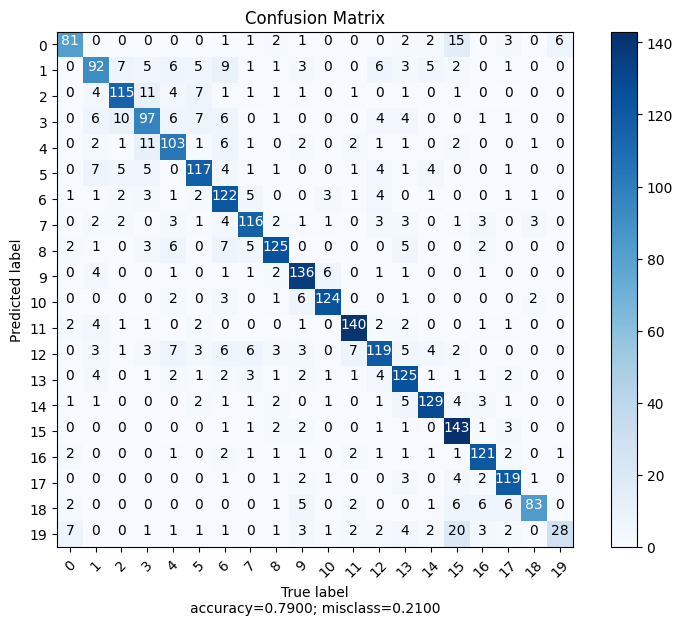

In [14]:
confusion = confusion_matrix(newsgroup_y_test, ng_ovr_lr_clf.predict(newsgroup_X_test))
plot_confusion_matrix(cm=confusion, target_names=[i for i in range(20)], title = 'Confusion Matrix',normalize=False)


Once again, the leading diagonal represents the true positives—the instances that were correctly classified. The rest of the matrix represents the instances that were incorrectly classified.

## Visualizing the decision boundaries
To solidify this concept, visualize the decision boundaries in a multiclass problem. For this exercise, you will create a fictitious dataset of paw-print features. In your fictitious dataset, there are three categories of creatures: large, medium, and small. There are two features per sample: the circumference of the paw print and the length of the stride.

In [15]:
# Use NumPy to generate random data
circ_large = np.random.uniform(5.6, 9.3, 50)
stride_large = np.random.uniform(18.5, 29.8, 50)
labels_large = np.ones(50, dtype=np.int8)

circ_med = np.random.uniform(4.7, 6.4, 50)
stride_med = np.random.uniform(13.2, 19.8, 50)
labels_med = np.full(50, 2, dtype=np.int8)

circ_small = np.random.uniform(2.3, 5.1, 50)
stride_small = np.random.uniform(8.7, 14.3, 50)
labels_small = np.zeros(50, dtype=np.int8)

# Construct a DataFrame
df = pd.DataFrame({'circumference': np.concatenate((circ_large, circ_med, circ_small)),
                   'stride': np.concatenate((stride_large, stride_med, stride_small)),
                   'target': np.concatenate((labels_large, labels_med, labels_small))})

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,circumference,stride,target
0,5.134963,13.345428,2
1,8.118455,20.278212,1
2,7.248924,28.100341,1
3,5.530508,14.349287,2
4,2.845950,12.277934,0


Next, train a classifier using the one-vs-rest strategy.

In [16]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.9736842105263158

When you fit a classifier with data, there are two properties that you can access. The coefficients of the model are stored in `coef_`, and the intercepts (biases) are stored in `intercept_`.

In [17]:
print(lr.coef_)
print(lr.intercept_)


[[-1.75894286 -1.46402469]
 [ 1.45582476  1.4689135 ]
 [ 0.23457702 -0.08273997]]
[ 27.92387761 -37.67284733  -0.49316994]


You can use these values to draw the decision boundaries on a plot.

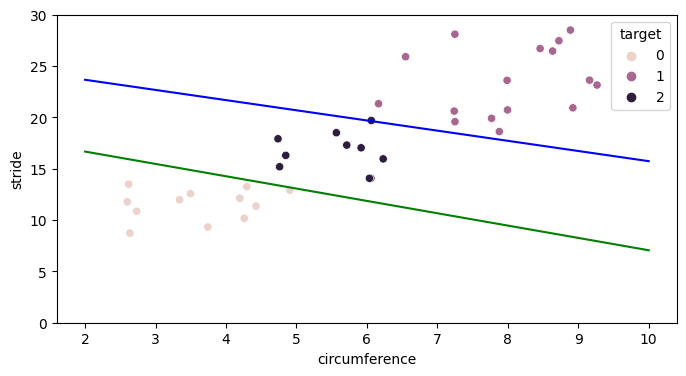

In [18]:
fig = plt.figure(figsize=(8,4))
ax = fig.subplots(1,1)
sns.scatterplot(x = 'circumference', y='stride', data=X_test,  hue=y_test)
colour = ['g-', 'b-']
for coef, c, col in zip(lr.coef_, lr.intercept_, colour):
  x = np.linspace(2, 10)
  y = (coef[0] * x + c) / -coef[1]
  ax.plot(x, y, col)
ax.set_ylim(0, 30)
plt.show()

In this plot, you can see the decision boundaries clearly demarcating the classes. Given a data sample with a circumference of `5` and a stride of `10`, you can plot that point on the graph and compare its position to the position of the lines. Because that point lies below the green line, it is clearly in category 0. The point with a circumference of `8` and a stride of `12`, on the other hand, is above the green line. This means that it isn't in category 0. To distinguish between categories 1 and 2, look at the blue line. Because the point is below the blue line, it is in category 2.